<a href="https://colab.research.google.com/github/Swathi04/Assignment_CMPE_255_Clustering/blob/main/K_Means_Clustering_CMPE_255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K Means Clustering

SUBMITTED BY: SWATHI ANANDRAM

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

##Necessary Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##Load Data

In [9]:
data_frame = pd.read_csv('Mall_Customers.csv')
data_frame

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##Create a new dataframe with features of interest

In [10]:
X = data_frame[['Annual Income (k$)', 'Spending Score (1-100)']]

##Visualization of existing data

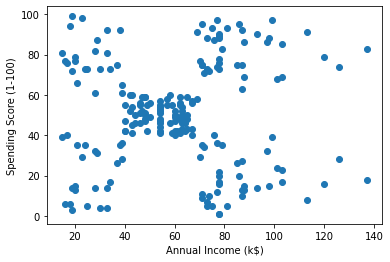

In [11]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

##Compute Within Cluster Sum of Squares if value of K needs to be determined using Elbow Method to determine what value of K gives the best clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (197). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (198). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (199). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


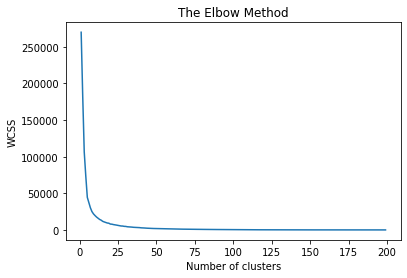

In [17]:
wcss = []
for i in range (1, 200):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=300)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,200), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##K=5 seems the correct number clusters that needs to be created

In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans= kmeans.fit_predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

##Visualisation of K means clusters and its centroids for K=5

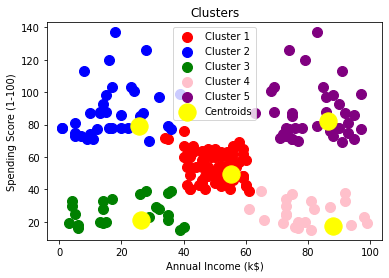

In [26]:
plt.scatter(X[y_kmeans == 0]['Spending Score (1-100)'], X[y_kmeans == 0]['Annual Income (k$)'], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Spending Score (1-100)'], X[y_kmeans == 1]['Annual Income (k$)'], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Spending Score (1-100)'], X[y_kmeans == 2]['Annual Income (k$)'], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Spending Score (1-100)'], X[y_kmeans == 3]['Annual Income (k$)'], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Spending Score (1-100)'], X[y_kmeans == 4]['Annual Income (k$)'], s = 100, c = 'purple', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()